In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from pyHidroWeb import download_hidroweb_data

Let's select a station in the Parnaiba river (Luzilândia station).

In [2]:
ds = download_hidroweb_data(34879500, data_type = 3)
ds

<xarray.Dataset>
Dimensions:                      (time: 15340)
Coordinates:
  * time                         (time) datetime64[ns] 2023-12-01 ... 1982-01-31
Data variables:
    flow_rate_consistency_level  (time) int64 1 1 1 1 1 1 1 1 ... 2 2 2 2 2 2 2
    flow_rate                    (time) float64 302.0 268.1 ... 1.037e+03

Now we can group by month and get the percentiles for the flow rate at each month (25%, 50% or median, 75%)

In [3]:
quantiles = ds.flow_rate.groupby("time.month").quantile([0.25, 0.5, 0.75])
quantiles.attrs = ds.flow_rate.attrs
quantiles

<xarray.DataArray 'flow_rate' (month: 12, quantile: 3)>
array([[ 420.5    ,  563.414  ,  803.89   ],
       [ 566.792  ,  743.034  , 1019.2625 ],
       [ 688.60625, 1022.51   , 1506.48   ],
       [ 735.131  , 1146.04   , 1881.88   ],
       [ 464.487  ,  636.846  ,  955.95175],
       [ 332.814  ,  417.743  ,  511.63225],
       [ 298.15575,  347.883  ,  408.602  ],
       [ 287.65975,  332.814  ,  368.585  ],
       [ 280.861  ,  325.425  ,  384.572  ],
       [ 289.925  ,  337.793  ,  395.451  ],
       [ 318.133  ,  379.5345 ,  482.767  ],
       [ 358.146  ,  461.48   ,  579.4345 ]])
Coordinates:
  * quantile  (quantile) float64 0.25 0.5 0.75
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    units:      m$^3\,$s$^{-1}$
    long_name:  flow rate

Here we plot the whole time series on the top and the seasonal median and spread on the bottom

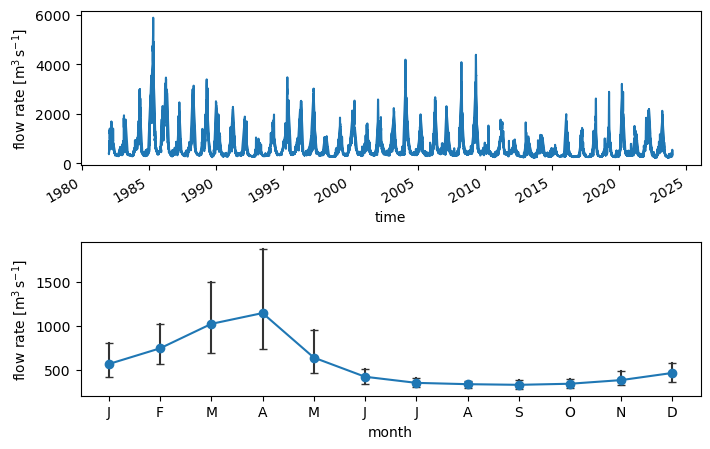

In [14]:
months = "J F M A M J J A S O N D".split()

fig, ax = plt.subplots(2, 1, figsize = (8, 5))
fig.subplots_adjust(hspace = 0.5)

ds.flow_rate.plot(ax = ax[0])
ax[1].plot([quantiles.month] * 2, quantiles.sel(quantile = [0.25, 0.75]).values.T, marker = "_", color = "0.2")
quantiles.sel(quantile = 0.5).plot(ax = ax[1], marker = "o")
ax[1].set(xticks = np.arange(len(months))+1, xticklabels = months, title = "");

Let's look more deep in the month of April. Here we average the flow rate for April for each year.

In [22]:
april = ds.flow_rate.where(ds.time.dt.month == 4, drop = True).groupby("time.year").mean()

What years that the flow rate is more than the 75% percentile for that month?

In [27]:
april.year.where((april>quantiles.sel(month = 4, quantile = 0.75)), drop = True)

<xarray.DataArray 'year' (year: 12)>
array([1984., 1985., 1986., 1988., 1989., 1995., 1996., 1997., 2000.,
       2006., 2008., 2009.])
Coordinates:
  * year      (year) int64 1984 1985 1986 1988 1989 ... 1997 2000 2006 2008 2009
    quantile  float64 0.75
    month     int64 4

What years that the flow rate is less than the 25% percentile for that month?

In [29]:
april.year.where((april<quantiles.sel(month = 4, quantile = 0.25)), drop = True)

<xarray.DataArray 'year' (year: 6)>
array([1993., 1998., 2012., 2013., 2015., 2016.])
Coordinates:
  * year      (year) int64 1993 1998 2012 2013 2015 2016
    quantile  float64 0.25
    month     int64 4